# Importing necessary libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import pickle

# Loading the dataset

In [2]:
dataset = pd.read_csv(r'C:\Users\megha\University of verona\Programming\Insurance Premium\insurance.csv')

# Dataset

In [3]:
print(dataset)


      age     sex   bmi  children smoker     region  expenses
0      19  female  27.9         0    yes  southwest  16884.92
1      18    male  33.8         1     no  southeast   1725.55
2      28    male  33.0         3     no  southeast   4449.46
3      33    male  22.7         0     no  northwest  21984.47
4      32    male  28.9         0     no  northwest   3866.86
...   ...     ...   ...       ...    ...        ...       ...
1333   50    male  31.0         3     no  northwest  10600.55
1334   18  female  31.9         0     no  northeast   2205.98
1335   18  female  36.9         0     no  southeast   1629.83
1336   21  female  25.8         0     no  southwest   2007.95
1337   61  female  29.1         0    yes  northwest  29141.36

[1338 rows x 7 columns]


In [4]:
dataset

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


# Perform exploratory data analysis

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
dataset.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [8]:
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [9]:
dataset.tail()

,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [12]:
dataset.shape

(1338, 7)

# Check for missing data

In [13]:
print(dataset.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64


In [14]:
# Remove duplicate entries if any
dataset = dataset.drop_duplicates()
print(dataset.shape)

(1337, 7)


# Visualizing the data

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning

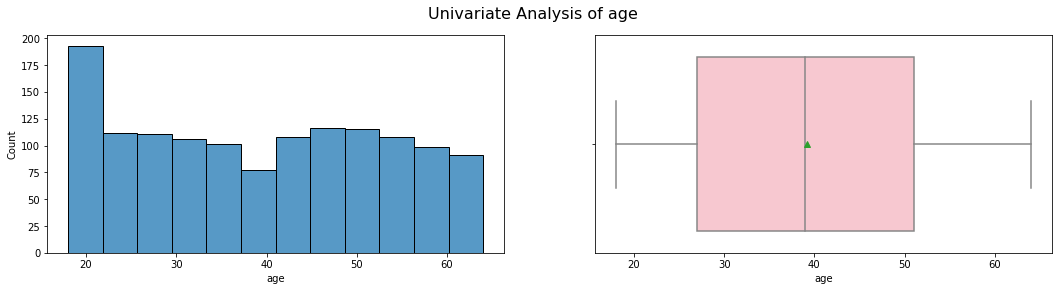

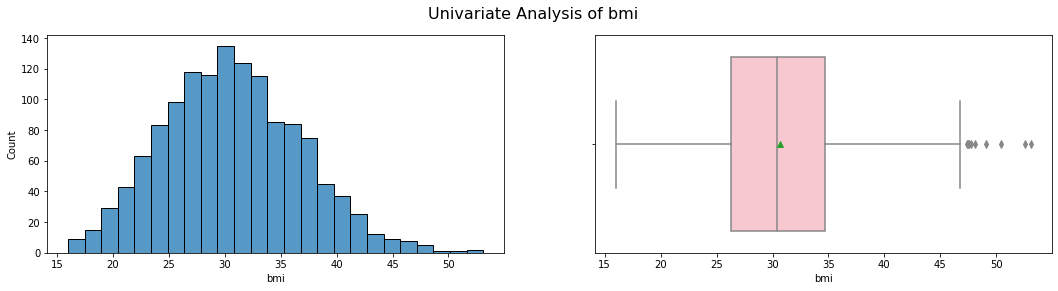

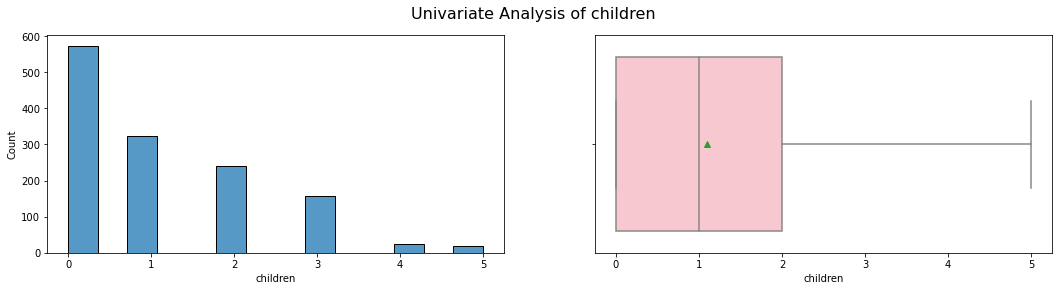

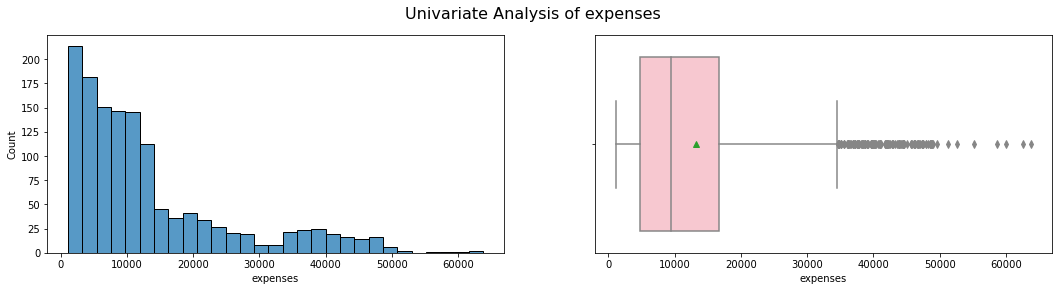

In [15]:
features_to_plot = ["age", "bmi", "children", "expenses"]
for feature in features_to_plot:
    fig, axs = plt.subplots(1, 2, figsize=(18,4))
    sns.histplot(dataset[feature], ax=axs[0], kde = False)
    sns.boxplot(dataset[feature], ax=axs[1], orient = "h", showmeans = True, color = "pink")
    fig.suptitle('Univariate Analysis of ' + feature, fontsize=16)

male      675
female    662
Name: sex, dtype: int64


<AxesSubplot:xlabel='sex', ylabel='expenses'>

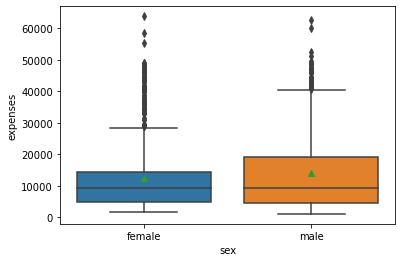

In [16]:
# Visualize categorical features
print(dataset['sex'].value_counts())
sns.boxplot(x = "sex", y = "expenses", data = dataset, showmeans = True)


<AxesSubplot:xlabel='region', ylabel='expenses'>

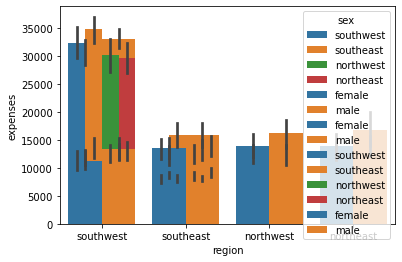

In [17]:
sns.barplot(x = "sex", y = "expenses",hue='region', data = dataset)
sns.barplot(x = "children", y = "expenses",hue='sex', data = dataset)
sns.barplot(x='smoker',y='expenses',hue='sex',data=dataset)
sns.barplot(x='smoker',y='expenses',hue='region',data=dataset)
sns.barplot(x='region',y='expenses',hue='sex',data=dataset)


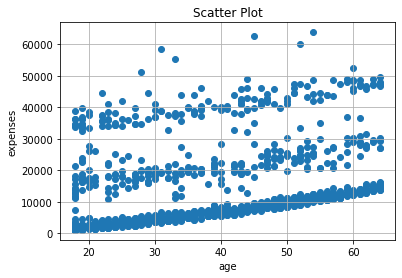

In [18]:
# Scatterplots
plt.scatter(dataset["age"], dataset["expenses"])
plt.xlabel("age")
plt.ylabel("expenses")
plt.title("Scatter Plot")
plt.grid()
plt.show()

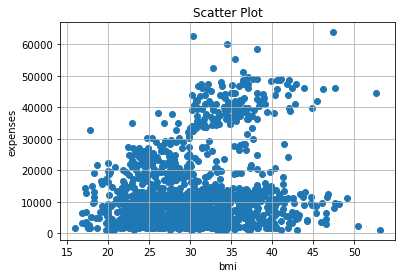

In [19]:

plt.scatter(dataset["bmi"], dataset["expenses"])
plt.xlabel("bmi")
plt.ylabel("expenses")
plt.title("Scatter Plot")
plt.grid()
plt.show()

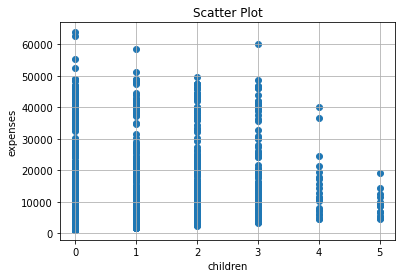

In [20]:
plt.scatter(dataset["children"], dataset["expenses"])
plt.xlabel("children")
plt.ylabel("expenses")
plt.title("Scatter Plot")
plt.grid()
plt.show()

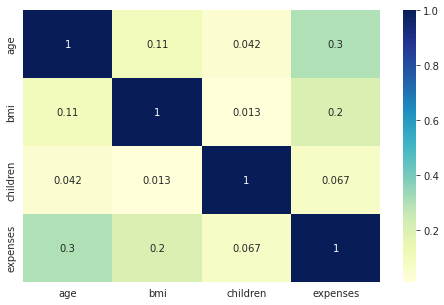

In [21]:
# Correlation heatmap
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 5))
    ax=sns.heatmap(dataset.corr(),annot=True,cmap="YlGnBu")

In [22]:
# Encoding categorical features
dataset['sex'] = dataset['sex'].map({'female':0,'male':1})
dataset['smoker'] = dataset['smoker'].map({'no':0,'yes':1})
dataset['region'] = dataset['region'].map({'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4})

C:\Users\megha\AppData\Local\Temp\ipykernel_11252\3945341834.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['sex'] = dataset['sex'].map({'female':0,'male':1})
C:\Users\megha\AppData\Local\Temp\ipykernel_11252\3945341834.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['smoker'] = dataset['smoker'].map({'no':0,'yes':1})
C:\Users\megha\AppData\Local\Temp\ipykernel_11252\3945341834.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usin

In [23]:
# Split the dataset into train and test sets
features = dataset.drop(['expenses'],axis=1)
target = dataset['expenses']

features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=0)


In [24]:
# Fit the model
model = LinearRegression()
model.fit(features_train,target_train)
predictions = model.predict(features_test)

In [25]:
# Evaluate the model
print('R2 Score:', metrics.r2_score(target_test, predictions))
print('MAE:', metrics.mean_absolute_error(target_test, predictions))
print('MSE:', metrics.mean_squared_error(target_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(target_test, predictions)))

R2 Score: 0.7526826622580061
MAE: 4400.631683776514
MSE: 41606088.58896106
RMSE: 6450.278179192046


In [26]:
# Save the model
pickle.dump(model, open('model.pkl','wb'))

# Load the model
loaded_model = pickle.load(open('model.pkl','rb'))